##### *Cristina Cosma*

# **DATA SCIENCE**

## **Sprint 7. ML - Algoritmes d’aprenentatge supervisat: Classificació**

### Tasca M7 T01 - Exercicis d'algoritmes de classificació amb Python a partir del dataset *Wine recognition data*.

**Objectius**
* Neteja i interpretació de les dades.
* Preprocessats.
* Creació de models de classificació (arbres de classificació, KNN - k-Nearest neighbors, regressió logística, support vector machine, XGboost, altres models...).
* Utilització de les mètriques per interpretar els resultats.
* Estudi i modificació de paràmetres.

___________
Lliurament: Enviar l'URL a un repositori anomenat *ML_regressions* que contingui la solució. S'ha d'entregar cada exercici en un mateix fitxer i en un repositori.

URL : **https://github.com/CristinaCosma/ML_classification** 
___________

## 0. Importar las librerías necesarias, cargar el dataset y preprocesar los datos 

In [225]:
# cálculos, dataframes, uso genereal
import pandas as pd
import numpy as np

# visualización
import matplotlib.pyplot as plt
import seaborn as sns


# ML : modelos de predicción / clasificación
# https://www.datacamp.com/tutorial/random-forests-classifier-python :
# Data Processing

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
# import graphviz ?--------->  ModuleNotFoundError: No module named 'graphviz'


# preprocesamiento de datos,test de hipótesis
from scipy.stats import shapiro
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector

# métricas
from sklearn.metrics import classification_report

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import precision_recall_fscore_support as score

import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston

import colorama
from colorama import Fore, Style




### **Recopilación de datos y análisis de la información relevante**

  
**Nombre original : *Wine recognition data***, actualizado en Sept 21, 1998. 

* Estos datos son el resultado de un análisis químico de vinos cultivados en la misma región de Italia que provienen de tres viñedos diferentes. 
* El análisis determinó las cantidades de 13 constituyentes por cada tipo de vinos.
* El primer atributo es el identificador de clase (Clases 1, 2 y 3)
* No hay valores faltantes en los atributos

**Los 13 atributos** son todos continuos. Se sugiere estandarizar variables para ciertos usos y se definen como :

0) Class
1) Alcohol
2) ácido málico
3) Ceniza
4) Alcalinidad de la ceniza
5) magnesio
6) fenoles totales
7) Flavonoides
8) Fenoles no flavonoides
9) Proantocianinas
10) intensidad del color
11) Tono
12) OD280/OD315 en vino diluido
13) Prolina

**Distribución de clases y número de instancias por clase**: 
* clase 1 : 59
* clase 2 : 71
* clase 3 : 48


**Fuentes principales** :

(a) Forina, M. et al, PARVUS - *An Extendible Package for Data
       Exploration, Classification and Correlation*. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genova, Italia.

(b) Stefan Aeberhard, D. Coomans and O. de Vel,
       *Comparison of Classifiers in High Dimensional Settings*,
       Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
       Mathematics and Statistics, James Cook University of North Queensland, Australia.
       (Also submitted to Technometrics).
       
   S. Stefan Aeberhard, D. Coomans and O. de Vel,
   *"THE CLASSIFICATION PERFORMANCE OF RDA"*
   Tech. Rep. no. 92-01, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Journal of Chemometrics). 

In [226]:
wines = pd.read_csv('C:/Users/Buba/Documents/CURSOS-PROGRAMACION/IT-Academy/IT-DATA-SCIENCE/DS-Sprint7_ML_classification/Wine-recognition-data/wineData.csv', 
                    sep = ",", encoding_errors= 'replace', engine='python', header=None)

In [227]:
wines.columns =['Class',
                'Alcohol',
                'Malic acid', 
                'Ash', 
                'Alcalinity of ash',
                'Magnesium', 
                'Total phenols', 
                'Flavanoids', 
                'Nonflavanoid phenols', 
                'Proanthocyanins',
                'Color intensity', 
                'Hue', 
                'OD280/OD315', 
                'Proline']
wines

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity of ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280/OD315           178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
# vemos cuántos valores únicos tiene la variable dependiente 
wines['Class'].value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [228]:
# cambiar tipo de la variable class a Strig para que no se le apliquen cálculos fraccionarios
wines['Class'].astype(str).astype('category')


0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Class, Length: 178, dtype: category
Categories (3, object): ['1', '2', '3']

In [7]:
# Vemos los valores únicos de cada uno de los atributos
wines.nunique()

Class                     3
Alcohol                 126
Malic acid              133
Ash                      79
Alcalinity of ash        63
Magnesium                53
Total phenols            97
Flavanoids              132
Nonflavanoid phenols     39
Proanthocyanins         101
Color intensity         132
Hue                      78
OD280/OD315             122
Proline                 121
dtype: int64

In [8]:
# Nos dice la información del dataset que no hay valores nulos, pero lo comprobamos igualmente:
wines.isnull().sum() | wines.isna().sum()

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
OD280/OD315             0
Proline                 0
dtype: int64

In [9]:
wines[wines.duplicated()] # ---> no hay

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline


In [10]:
wines.min()

Class                     1.00
Alcohol                  11.03
Malic acid                0.74
Ash                       1.36
Alcalinity of ash        10.60
Magnesium                70.00
Total phenols             0.98
Flavanoids                0.34
Nonflavanoid phenols      0.13
Proanthocyanins           0.41
Color intensity           1.28
Hue                       0.48
OD280/OD315               1.27
Proline                 278.00
dtype: float64

In [11]:
wines.max()

Class                      3.00
Alcohol                   14.83
Malic acid                 5.80
Ash                        3.23
Alcalinity of ash         30.00
Magnesium                162.00
Total phenols              3.88
Flavanoids                 5.08
Nonflavanoid phenols       0.66
Proanthocyanins            3.58
Color intensity           13.00
Hue                        1.71
OD280/OD315                4.00
Proline                 1680.00
dtype: float64

In [12]:
# variables span 
# miramos la extensión de los datos con la diferencia entre las minimas y las máximas para ver como se disparan algunos respeto a otros
wines.max()-wines.min()

Class                      2.00
Alcohol                    3.80
Malic acid                 5.06
Ash                        1.87
Alcalinity of ash         19.40
Magnesium                 92.00
Total phenols              2.90
Flavanoids                 4.74
Nonflavanoid phenols       0.53
Proanthocyanins            3.17
Color intensity           11.72
Hue                        1.23
OD280/OD315                2.73
Proline                 1402.00
dtype: float64

In [13]:
wines.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Class,178.0,1.94,0.78,1.00,1.00,2.00,3.00,3.00
Alcohol,178.0,13.00,0.81,11.03,12.36,13.05,13.68,14.83
Malic acid,178.0,2.34,1.12,0.74,1.60,1.87,3.08,5.80
Ash,178.0,2.37,0.27,1.36,2.21,2.36,2.56,3.23
Alcalinity of ash,178.0,19.49,3.34,10.60,17.20,19.50,21.50,30.00
Magnesium,178.0,99.74,14.28,70.00,88.00,98.00,107.00,162.00
Total phenols,178.0,2.30,0.63,0.98,1.74,2.36,2.80,3.88
Flavanoids,178.0,2.03,1.00,0.34,1.20,2.13,2.88,5.08
Nonflavanoid phenols,178.0,0.36,0.12,0.13,0.27,0.34,0.44,0.66
Proanthocyanins,178.0,1.59,0.57,0.41,1.25,1.56,1.95,3.58


### **Observación de correlaciones entre las variables**

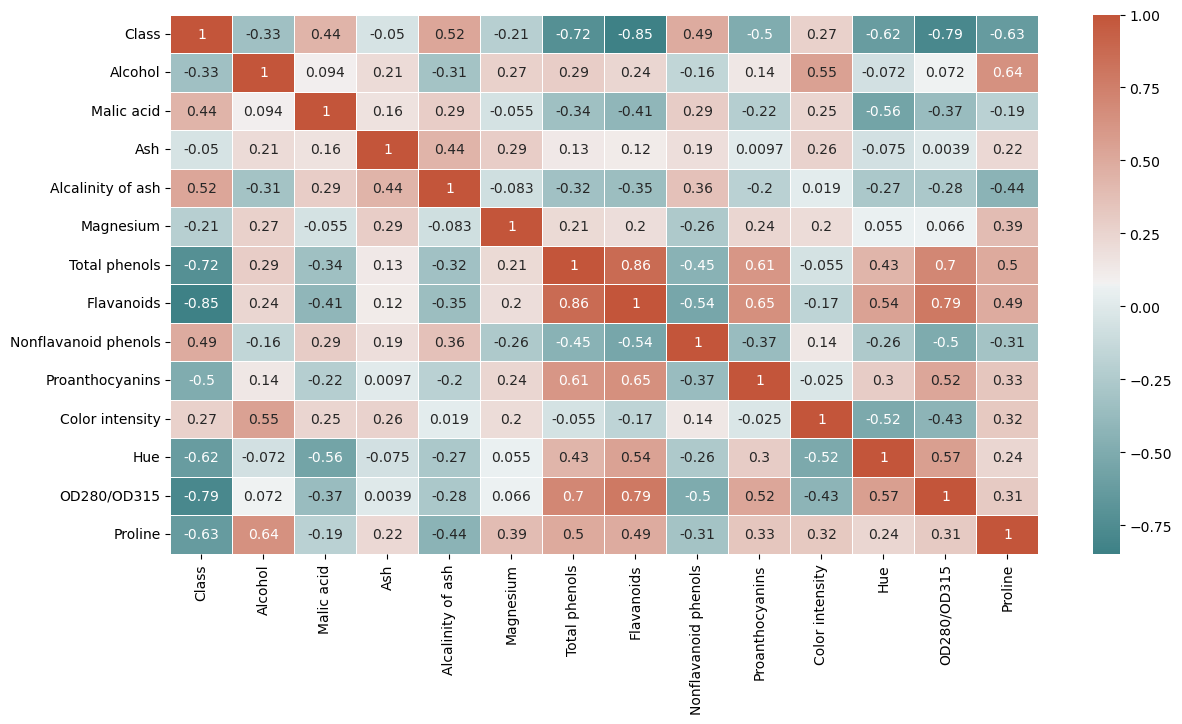

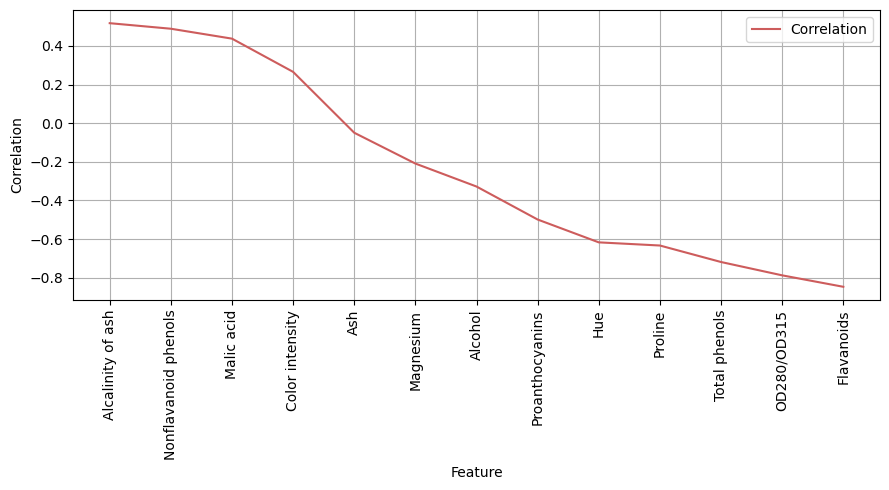

In [14]:
# gráfico heatmap de correlación :

plt.figure(figsize=(14,7))
corr = wines.corr()
#corr=abs(data.corr())
cmap = sns.diverging_palette(200, 20, as_cmap=True)
sns.heatmap(corr, annot=True,  annot_kws={"fontsize": 10}, linewidth= 0.5, cmap=cmap)
plt.show()

plt.figure(figsize=(9, 5))
plt.plot(corr["Class"].sort_values(ascending=False)[1:], label="Correlation", color="indianred") # graf de línea
plt.ylabel("Correlation")
plt.xlabel("Feature")
plt.tick_params(axis='x', rotation=90)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

**Correlaciones más importantes:**
* Class, que es la variable target, está relacionada negativamente con Flavanoids, OD280/OD315 y Total phenols
* En los siguientes scatterplots observamos que los vinos de Clase 1 contienen mucha cantidad de estas substáncias, mientras que los de Clase 3 tendrían poca.
* La correlación más fuerte y es positiva (0.86), se da entre Flavanoids (un tipo de fenoles presentes en el vino) y Total phenols (la concentración total de fenoles en el vino)
* Otra relación fuerte positiva es entre OD280/OD315 con Flavanoids, Total phenols y Class
* ---> a continuación veremos gráficamente las 3 categorías de vinos y como se ubican en relación con las variables de mayor influencia


**Correlaciones de importancia media :**
* Class con Malic acid, Alcalinity of ash, Nonflavanoid phenols, Proanthocyanins, Hue y Proline.
* Proanthocyanins con 
* Alcohol con Proline y Color intensity
* Malic acid con Hue, Color Intensity, Flavanoids y Class
* Proanthocyanins con Flavanoids y Total phenols
* Color intensity con Hue y Alcohol
* Alcohol con COlor intensity y Proline

**Poca o sin sin correlación :**
* Ash no influye mucho en las otras variables, sólo un poco (cerca del 0.3) en Magnesium, Alcalinity of ash y Color intensity.

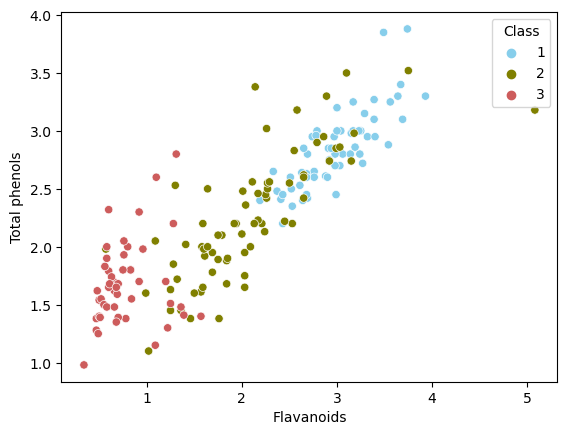

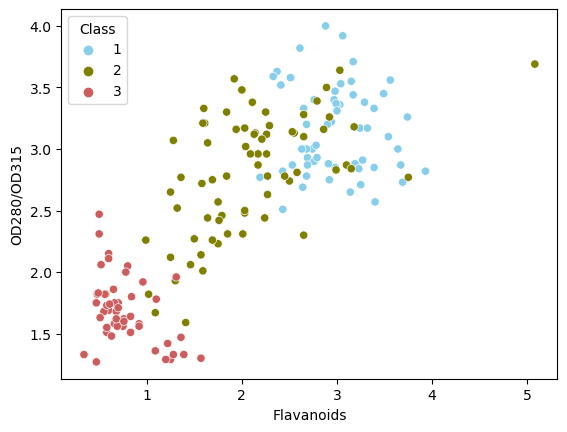

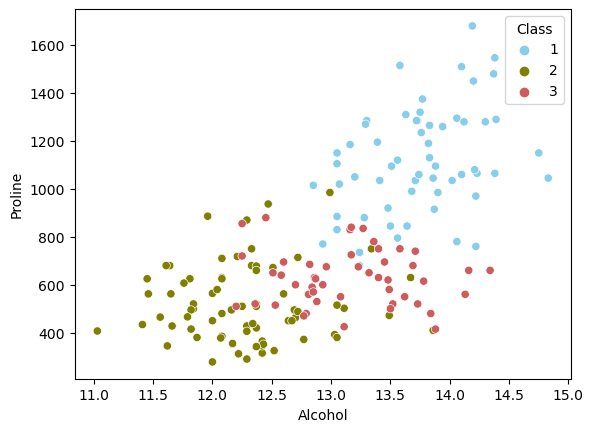

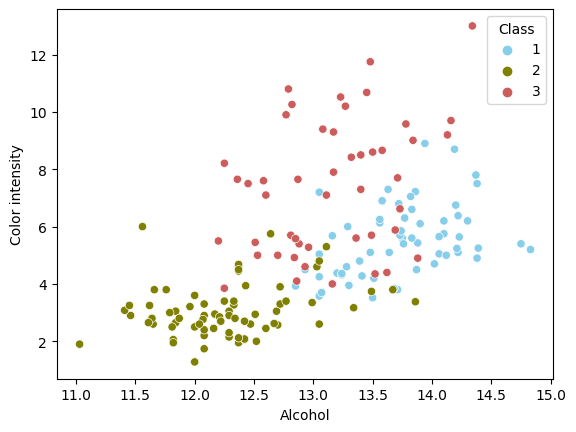

In [15]:
# visualizar la influencia de ciertas variables en la detección / asignación de las clases de vinos
color_dict={1: 'skyblue', 2:'olive', 3:'indianred'} #color de les 3 classes de vins 
sns.scatterplot(wines['Flavanoids'], wines['Total phenols'], hue=wines['Class'],palette=color_dict)
plt.show()
sns.scatterplot(wines['Flavanoids'], wines['OD280/OD315'], hue=wines['Class'],palette=color_dict)
plt.show()
sns.scatterplot(wines['Alcohol'], wines['Proline'], hue=wines['Class'],palette=color_dict)
plt.show()
sns.scatterplot(wines['Alcohol'], wines['Color intensity'], hue=wines['Class'],palette=color_dict)
plt.show()

### **Distribución de los datos, observación de outliers y anomalías**

* Miramos en elsiguinete gráfico como se extienden los datos de cada columna y dentro del conjunto. 


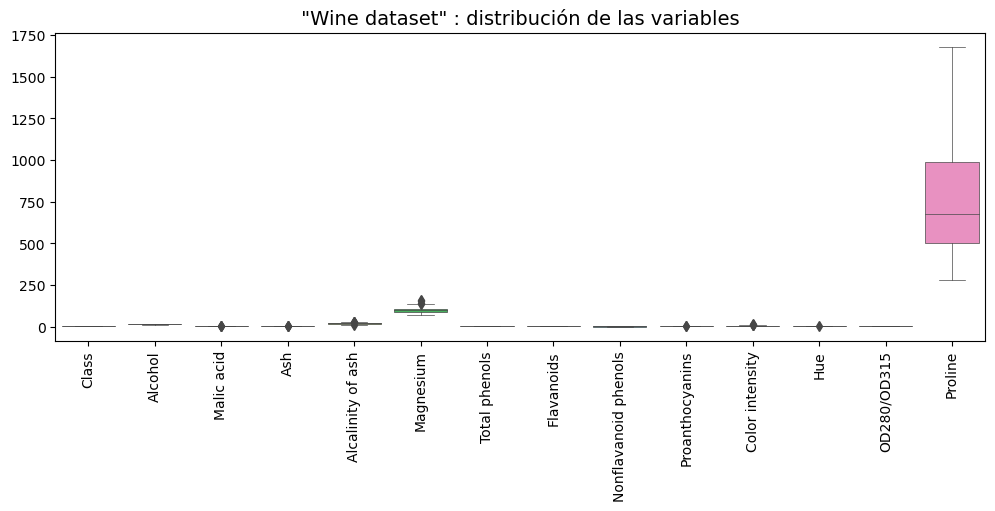

In [16]:
fig, ax = plt.subplots(figsize=(12, 4))
ax = sns.boxplot(data = wines, linewidth= 0.5)
plt.title(' "Wine dataset" : distribución de las variables ', fontsize=14)
plt.tick_params(axis='x', rotation=90)
plt.show()

* Claramente hay variables que están en diferentes órdenes de magnitud respecto al resto, como es el caso de 'Magnesium', 'Alcalinity of ash' y más aún, 'Proline', por lo que habrá que ver las variables por separado.


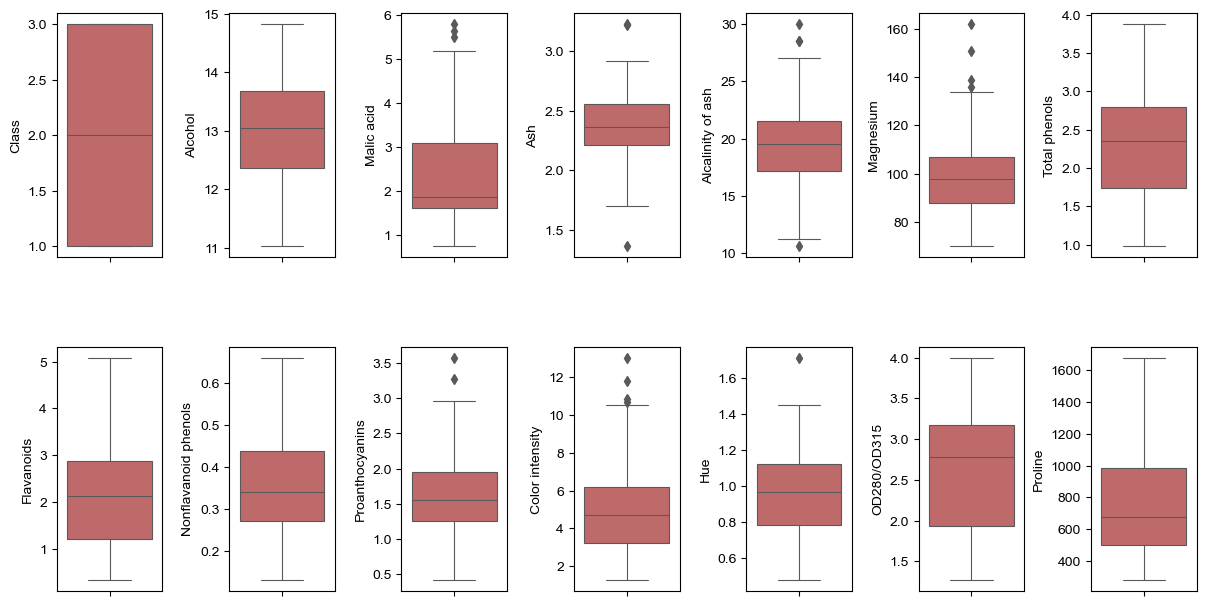

In [17]:
# visualización de la distribución y magnitud de las variablles por separado
# cálculo de los outliers en cada una

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(12, 6))
index = 0
axs = axs.flatten()

for k, v in wines.items():
    sns.boxplot(y=k, data=wines, ax=axs[index], linewidth= 0.8, color = 'indianred')
    sns.set(style = "whitegrid")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [18]:
for k, v in wines.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(wines)[0]
        print("%s outliers = %.2f%%" % (k, perc))

Class outliers = 0.00%
Alcohol outliers = 0.00%
Malic acid outliers = 1.69%
Ash outliers = 1.69%
Alcalinity of ash outliers = 2.25%
Magnesium outliers = 2.25%
Total phenols outliers = 0.00%
Flavanoids outliers = 0.00%
Nonflavanoid phenols outliers = 0.00%
Proanthocyanins outliers = 1.12%
Color intensity outliers = 2.25%
Hue outliers = 0.56%
OD280/OD315 outliers = 0.00%
Proline outliers = 0.00%


* Tenemos **outliers** en lo siguientes atributos: Malic acid, Ash, Alcalinity of ash, Magnesium, Proanthocyanins, Color intensity y Hue. 
* Los **valores más correlacionados con el target Class**, como Proline, OD280/OD315, Flavanoids, Total phenols y Alcohol, **no presentan outliers.**
* Hay relativamente pocos outliers en % y se sitúan en 7 de las 14 variables y sobretodo en las de menor correlación con Class, excepto Alcalinity of ash que tiene 3. 
* Sólo el parámetro **Alcalinity of ash** tiene una distribución normal.
* Para empezar, los valores del dataset se dejará tal cual y **el escalado de datos se hará en el Ejercicio 5** para ver la diferencia en los resultados de todo el proceso de clasficación.

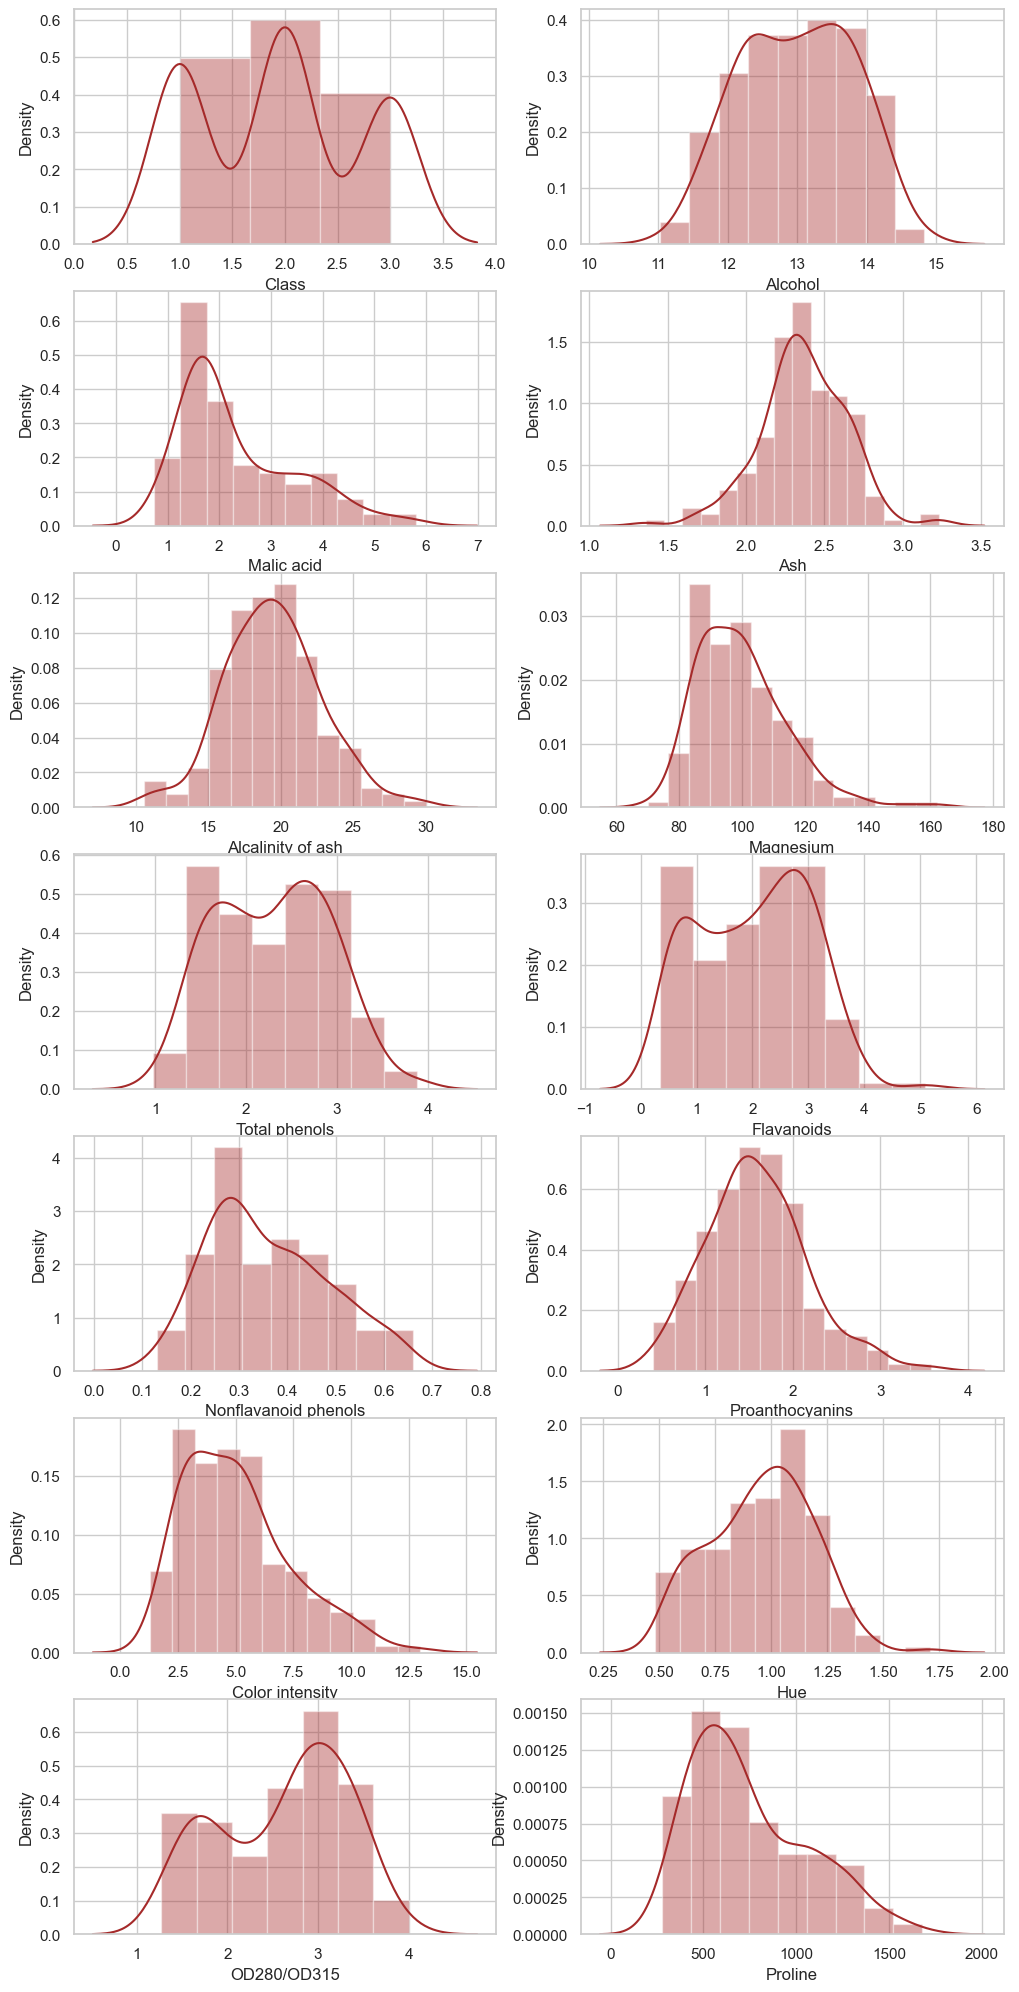

In [19]:
fig, ax1 = plt.subplots(ncols=2, nrows=7, figsize=(12, 25))
k = 0
columns = list(wines.columns)
for i in range(7):
    for j in range(2):
            sns.distplot(wines[columns[k]], ax = ax1[i][j], color = 'brown')
            ax1[i][j].grid(True)
            k += 1
plt.show()

In [20]:
import colorama
from colorama import Fore, Style

# prueba de color 
print(Fore.BLUE + "Es un test de color para el dataset de vinos")
print(f"{Fore.RED}Es un test de color para el dataset de vinos{Style.RESET_ALL}")

Es un test de color para el dataset de vinos
Es un test de color para el dataset de vinos


In [21]:
# Comprobamos mediante shapiro qué variables presentan distribución gaussinana : sólo Alcalinity of ash es el único que presenta una distribución normal.

from scipy.stats import shapiro

col = list(wines.columns)

def distr_normal(wines):
    normal = []
    for col in wines.columns:
        p_valor = shapiro(wines[col])[1]
        normal.append(p_valor > 0.05)
    return normal
resultado = distr_normal(wines)

for resultado in resultado :
    if resultado is True : 
        print(Fore.GREEN, resultado, Style.RESET_ALL)
    else :
        print( Fore.RED, resultado, Style.RESET_ALL)

 False 
 False 
 False 
 False 
 True 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 


#### Asignamos las variables de entrada y de salida y vemos su dimensión 

In [229]:
X= wines.drop(['Class'], axis=1)
X.head()
X[:5]

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [230]:
Y=wines.iloc[:,:1]
# Y=wines['Class']
Y

,Class
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


**Variable TARGET** : 
* Visualización del conjunto de datos que representa cada item por la clase de vinos correspondiente donde vemos que es muy equilibrado.

* Recordamos la fórmula que nos decía cuántos valores hay por cada categoría:

- wines['Class'].value_counts()
    - Class 1  :    59
    - Class 2  :    71
    - Class 3  :    48


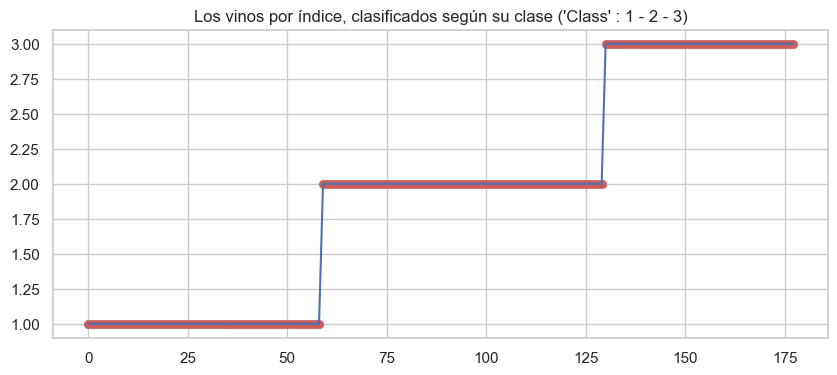

In [24]:
plt.figure(figsize=(10,4))
plt.scatter(wines.index, wines["Class"], color="indianred", linewidth= 0.5)
plt.plot(wines.index, wines["Class"])
plt.title("Los vinos por índice, clasificados según su clase ('Class' : 1 - 2 - 3)")
plt.grid(True)
plt.show()

#### Procedemos al *data split* con unos ratios 80% / 20%

In [231]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print(X_train.shape)
print(Y_train.shape)

(142, 13)
(142, 1)


In [26]:
print(X_test.shape)
print(Y_test.shape)

(36, 13)
(36, 1)


#### **Crear al menos dos models de classificació para intentar predecir las clases de vinos.**

* Para elegir modelos, vamos a valorar la idoneidad de varios modelos de clasificación con el dataset original 
https://www.kaggle.com/code/abhikaggle8/wine-classification/notebook :
* Se van a pre-processar datos para el Ejercicio 5

In [232]:
# Classifier Models

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = []
models.append(("Logistic Regression:", LogisticRegression()))
models.append(("Naive Bayes:", GaussianNB()))
models.append(("K-Nearest Neighbour:", KNeighborsClassifier()))
models.append(("K-Nearest Neighbour:", KNeighborsClassifier(3)))
models.append(("Decision Tree:", DecisionTreeClassifier()))
models.append(("Support Vector Machine-linear:", SVC(kernel="linear")))
models.append(("Support Vector Machine-rbf:", SVC(kernel="rbf")))
models.append(("Support Vector Machine-poly:", SVC(kernel="poly")))
models.append(("Random Forest:", RandomForestClassifier()))
models.append(("Random Forest:", RandomForestClassifier(7)))
models.append(("Random Forest:", RandomForestClassifier(max_depth=5, n_estimators=100)))
models.append(("XGB eXtreme Gradient Boost:", XGBClassifier()))
models.append(("MLP:", MLPClassifier(hidden_layer_sizes=())))
models.append(("MLP:", MLPClassifier(alpha=1, max_iter=1000)))
models.append(("MLP:", MLPClassifier(hidden_layer_sizes=(45,30,15),solver='sgd',learning_rate_init=0.01,max_iter=500)))
models.append(("AdaBoostClassifier:", AdaBoostClassifier()))
models.append(("GradientBoostingClassifier:", GradientBoostingClassifier()))

In [233]:
# resultados de los tests para modelos generales de clasificación

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True)
    cv_result = cross_val_score(model, X_train, Y_train.values.ravel(), cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)

print('PREVISUALIZACIÓN DE LOS PRINCIPALES MODELOS DE CLASIFICACIÓN \n',
      '(con parámetros por defecto y algunos más específicos para ver como afecta) :\n')

for i in range(len(names)):
    if results[i].mean()*100 >= 90 : 
        print(Fore.GREEN, names[i], (results[i].mean()*100).round(2), Style.RESET_ALL)
    else :
        print(Fore.RED, names[i], (results[i].mean()*100).round(2), Style.RESET_ALL)

PREVISUALIZACIÓN DE LOS PRINCIPALES MODELOS DE CLASIFICACIÓN 
 (con parámetros por defecto y algunos más específicos para ver como afecta) :

 Logistic Regression: 96.48 
 Naive Bayes: 97.29 
 K-Nearest Neighbour: 68.19 
 K-Nearest Neighbour: 71.9 
 Decision Tree: 92.24 
 Support Vector Machine-linear: 96.48 
 Support Vector Machine-rbf: 67.57 
 Support Vector Machine-poly: 63.29 
 Random Forest: 97.86 
 Random Forest: 96.48 
 Random Forest: 98.57 
 XGB eXtreme Gradient Boost: nan 
 MLP: 37.52 
 MLP: 67.48 
 MLP: 35.14 
 AdaBoostClassifier: 86.57 
 GradientBoostingClassifier: 95.1 


Según el cálculo, **varios modelos (en letra verde) nos dan buenos resultados de clasificación** con parámetros estandar y sin siquiera tener que retocar los datos ; Otros, como K-Nearest Neighbour o K-Means, funcionan mejor con escalas pequeñas de datos y es probable que una vez hecho el escalado en las vaariables con mucha dispersión, vayan a mejorar los resultados.

**El trabajo se concentrará en los siguientes modelos** :
* **Random Forest Classifier** : para ver si se mantiene o mejora el buen resultado
* **K-Nearest Neighbors Classifier** :  no da buen resultado con la fórmula por defecto en este dataset a pesar de ser conocido como un buen modelo, por lo que nos lo quedamos para ver cómo con parámetros y otros ajustes en los datos (Ejercicio 5) se puede mejorar la predicción



### **Crear modelo de clasificación con K-Neighbors Classifier**

K-Neighbors Classifier es un algoritmo de aprendizaje supervisado donde KNN significa K-Nearest Neighbor. Por lo general, en la mayoría de los algoritmos de aprendizaje supervisado, entrenamos el modelo utilizando un conjunto de datos de entrenamiento para crear un modelo que se generalice bien para predecir datos desconocidos.

Pero el algoritmo KNN es un algoritmo vago, lo que significa que no implica ninguna fase de entrenamiento. El algoritmo simplemente almacena el conjunto de datos de entrenamiento inicial y lo utiliza en el momento de la clasificación. (Por lo tanto, es una ejecución "perezosa").

Al mismo tiempo, KNN también es un algoritmo no paramétrico, lo que significa que no asume ninguna distribución de datos para funcionar correctamente. El algoritmo de clasificación KNN en sí es bastante simple e intuitivo. Cuando se proporciona un punto de datos al algoritmo, con un valor dado de K, busca los K vecinos más cercanos a ese punto de datos. Los vecinos más cercanos se encuentran calculando la distancia entre el punto de datos dado y los puntos de datos en el conjunto de datos inicial. Puede utilizar técnicas como la distancia euclidiana, la distancia de Manhattan y la distancia coseno para calcular la distancia.

Una vez que se identifican K vecinos más cercanos, el algoritmo KNN determina a qué clase pertenece la mayoría de los vecinos. Por ejemplo, si la mayoría de los vecinos pertenecen a la clase "Verde", entonces el punto de datos dado también se clasifica como clase "Verde".

KNN es computacionalmente costoso ya que carga todo el conjunto de datos en la memoria para su clasificación. Cuando el número de características del conjunto de datos es muy alto, puede sufrir una maldición de dimensionalidad y puede tener un rendimiento deficiente. Hay otro aspecto de la elección del valor de 'K' que puede producir resultados diferentes para diferentes valores de K. Por lo tanto, el ajuste de hiperparámetros de K se convierte en un papel importante en la producción de un clasificador KNN robusto. En Sklearn podemos usar GridSearchCV para encontrar el mejor valor de K dentro del rango de valores.
https://machinelearningknowledge.ai/knn-classifier-in-sklearn-using-gridsearchcv-with-example/

In [263]:
from sklearn.neighbors import KNeighborsClassifier

# Create Decision Tree classifer object
clf_kn = KNeighborsClassifier()

# adjustar
clf_kn.fit(X, Y)
clf_kn.fit(X_train, Y_train)

y_pred_kn = clf_kn.predict(X_test)
y_pred_kn


array([1, 2, 2, 1, 2, 2, 1, 3, 2, 2, 1, 2, 1, 3, 1, 2, 1, 1, 2, 1, 2, 1,
       3, 2, 2, 2, 2, 2, 3, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

#### **2.a) Model Performance : métricas**

Empezamos por las métricas básicas, como el nivel de ajuste al original (X_train, Y_train) y *accuracy*, que se puede obtener con varas fórmulas (exactitud de las predicciones)
* Accuracy está bien, muy alto,  y el testing con su ajuste al original está más alto aún, podríamos decir que *overtfitted*

In [264]:
# print("Accuracy score : % {}".format(metrics.accuracy_score(Y_test, y_pred)*100)) 

print(clf_kn.score(X_train, Y_train))
print(clf_kn.score(X_test, Y_test).round(2))
accuracy_score(Y_test, y_pred_kn).round(2)

0.7887323943661971
0.81


0.81

In [265]:
# EXERCICI 2 a) Model Performance : accuracy scores & metrics

from sklearn import metrics
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred_kn)) # y_pred = clf.predict(X_test)

              precision    recall  f1-score   support

           1       0.87      0.93      0.90        14
           2       0.88      0.88      0.88        16
           3       0.40      0.33      0.36         6

    accuracy                           0.81        36
   macro avg       0.71      0.71      0.71        36
weighted avg       0.79      0.81      0.80        36



**Classification report aporta los siguientes datos:**

* Precisión (Precision): que es la proporción de verdaderos positivos (TP : True Positives) dividida entre el total de predicciones positivas. 

    --> Para las clases 1 y 2 tiene una precisión relativamente buena pero para clase 3, solamente del 40 %.

* Sensibilidad (Recall): que es la proporción de TP dividida por la suma de TP y falsos negativos (FN). 

    --> Vemos que tiene recall bueno para las clases 1 y 2 tiene, pero para clase 3, solamente del 33 %.

* Puntuación F1 (F1-score): que es la media armónica de la precisión y la sensibilidad. 

    --> Muy bueno para clases 1 y 2 tiene, pero para clase 3, solamente da 36 %.
    
* Soporte (Support): que indica el número total de ejemplos por clase.
* Exactitud (Accuracy): que es la proporción de clasificaciones correctas en relación al total de muestras.

#### **2.b) Model Performance : confusion_matrix**

In [266]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


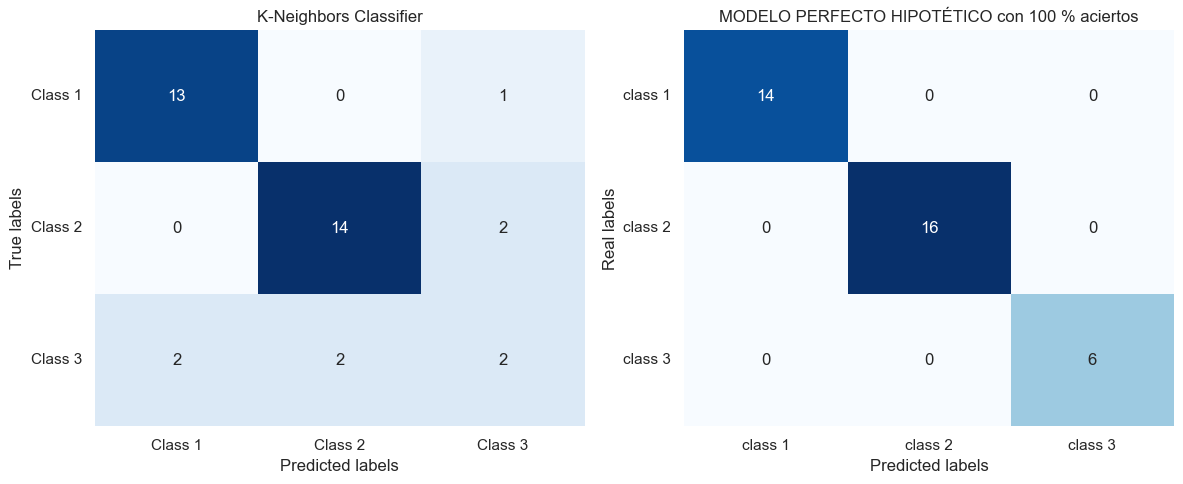

In [267]:
# Creamos una figura para mostrar las 2 matrices de confusión:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Instanciamos una matriz para cada modelo:
matrix_kn = metrics.confusion_matrix(Y_test, y_pred_kn)
other_model = metrics.confusion_matrix(Y_test, y_pred)

# Configuramos las clases
Class = ['Class 1','Class 2','Class 3']
                  
# Heatmap 1
sns.heatmap(matrix_kn, annot=True, fmt='d', ax=axs[0], cmap='Blues', cbar=False)
axs[0].set_xlabel('Predicted labels')
axs[0].set_ylabel('True labels')
axs[0].set_title('K-Neighbors Classifier')
axs[0].xaxis.set_ticklabels(Class)
axs[0].yaxis.set_ticklabels(Class, rotation=0)

# Heatmap 2
sns.heatmap(other_model, annot=True, fmt='d', ax=axs[1], cmap='Blues', cbar=False)
axs[1].set_xlabel('Predicted labels')
axs[1].set_ylabel('Real labels')
axs[1].set_title('MODELO PERFECTO HIPOTÉTICO con 100 % aciertos')
axs[1].xaxis.set_ticklabels(Nro_Class)
axs[1].yaxis.set_ticklabels(Nro_Class, rotation=0)


# Mostra la figura
plt.tight_layout()
plt.show()

* Hay 7 errores, de los cuáles 4 en la clase 3, donde de 6 items, solamente acertó 2. 
* Esto puede ser debido a como se dividió el Train / Test, y a raíz de ello, como muestra "support", la clase 3 ha quedado infra-representada (tiene 6 items mientras que las clases 1 y 2 tienen 14 y 16).
* Los resultados son buenos en las clases 1 (1 error sobre 14) ; la clase 2 tiene 2 erroes sobre 16; la clase 3 tiene 4 errores sobre 6.   


#### **2.c) Model Performance : predicción y comprobación con datos de vinos en concreto**

In [268]:
# COMPROBACIONES DE PREDICCIÓN : predice sobre observaciones en particular 

''' Acierta para los siguientes vinos ? ---> no todos '''

# X.iloc[3]
print('Prob. Class 1/2/3 :', clf_kn.predict_proba([[14.37, 1.95, 2.50, 16.8, 113, 3.85, 3.49, 0.24, 2.18, 7.80, 0.86, 3.45, 1480]]))
print('Resultado predict : Class', clf_kn.predict([[14.37, 1.95, 2.50, 16.8, 113, 3.85, 3.49, 0.24, 2.18, 7.80, 0.86, 3.45, 1480]]),'\n')

# X.iloc[177]
print('Prob. Class 1/2/3 :', clf_kn.predict_proba([[14.13, 4.10, 2.74, 24.5, 96, 2.05, 0.76, 0.56, 1.35, 9.20, 0.61, 1.60, 560]]))  
print('Resultado predict : Class', clf_kn.predict([[14.13, 4.10, 2.74, 24.5, 96, 2.05, 0.76, 0.56, 1.35, 9.20, 0.61, 1.60, 560]]),'\n')

# X.iloc[5] '''---> ### tiene que dar clase 1, pero da 3 ###

print('Prob. Class 1/2/3 :', clf_kn.predict_proba([[13.24, 2.59, 2.87, 21.0, 118, 2.80, 2.69, 0.39, 1.82, 4.32, 1.04, 2.93, 735]])) 
print('Resultado predict : Class', clf_kn.predict([[13.24, 2.59, 2.87, 21.0, 118, 2.80, 2.69, 0.39, 1.82, 4.32, 1.04, 2.93, 735]]),'\n', '-> tiene que dar clase 1') 

'''A continuación pregunto por vinos con valores que no ha visto nunca (me los he inventado)'''

# valor no visto antes
print('Prob. Class 1/2/3 :', clf_kn.predict_proba([[13.75, 2.0, 3.0, 18.0, 100, 3, 4, 1, 4, 5, 1.5, 4, 900]]))
print('Resultado predict : Class', clf_kn.predict([[13.75, 2.0, 3.0, 18.0, 100, 3, 4, 1, 4, 5, 1.5, 4, 900]]),'\n')

# valor no visto antes
print('Prob. Class 1/2/3 :', clf_kn.predict_proba([[11.5, 2.0, 2.0, 16.0, 110, 3, 4, 3, 2, 5, 1.5, 4, 500]])) 
print('Resultado predict : Class', clf_kn.predict([[11.5, 2.0, 2.0, 16.0, 110, 3, 4, 3, 2, 5, 1.5, 4, 500]]),'\n') 

Prob. Class 1/2/3 : [[1. 0. 0.]]
Resultado predict : Class [1] 

Prob. Class 1/2/3 : [[0.  0.4 0.6]]
Resultado predict : Class [3] 

Prob. Class 1/2/3 : [[0.  0.4 0.6]]
Resultado predict : Class [3] 

Prob. Class 1/2/3 : [[0.6 0.2 0.2]]
Resultado predict : Class [1] 

Prob. Class 1/2/3 : [[0.  0.4 0.6]]
Resultado predict : Class [3] 



* Observamos con **predict_proba** que muchas veces no es tan seguro en las predicciones como el modelo Random Forest Classifier.

In [269]:
print('Predicción de clase : ', clf_kn.predict(X_test),'\n')
print('Class 1/ Class 2/ Class 3 (Probabilidad de predicción por cada categoría donde la máxima seguridad o 100% seguro, es 1.0):\n\n', clf_kn.predict_proba(X_test))

Predicción de clase :  [1 2 2 1 2 2 1 3 2 2 1 2 1 3 1 2 1 1 2 1 2 1 3 2 2 2 2 2 3 3 1 1 2 1 1 1] 

Class 1/ Class 2/ Class 3 (Probabilidad de predicción por cada categoría donde la máxima seguridad o 100% seguro, es 1.0):

 [[1.  0.  0. ]
 [0.  0.6 0.4]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [0.  1.  0. ]
 [0.  0.8 0.2]
 [1.  0.  0. ]
 [0.  0.4 0.6]
 [0.  0.8 0.2]
 [0.  0.6 0.4]
 [0.6 0.2 0.2]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [0.4 0.2 0.4]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [0.  0.4 0.6]
 [0.  0.6 0.4]
 [0.2 0.4 0.4]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [0.  0.6 0.4]
 [0.  0.2 0.8]
 [0.  0.4 0.6]
 [1.  0.  0. ]
 [0.8 0.2 0. ]
 [0.  0.6 0.4]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.4 0.4 0.2]]


* Podemos ver que a veces no tiene clara la clase exacta de algunos vinos, seguramente cuando los valores de las variables observadas pueden pertenecer a más de una clase.
* Veamos unos ejemplos, como cuando predice este tipo de probabilidad : [0.4 0.4 0.2], [0.4 0.2 0.4] o [0.  0.4 0.6].

In [273]:
# vemos las predicciones para todo el conjunto X
# ---> sólo hay un fallo : en la zona ordenada de Class 2 se encuentra una predicción como CLass 3

print(clf_kn.predict(X[:178]))


[1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 3 3 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 2 2 2 2 2 1 2 2 2 2 1
 1 2 2 3 1 2 2 3 2 2 3 2 2 2 2 2 2 2 2 2 2 1 3 2 3 2 3 2 2 2 2 2 2 2 2 2 3
 2 3 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 3 3 2 3 3 2 3 3 2 3 3 1 3 3 1 3 2 2
 3 3 3 2 2 2 3 3 2 2 3 2 3 3 3 3 3 3 3 2 1 3 3 2 3 3 3 3 3 3]


In [276]:
# REDEFINIMOS EL MODELO

clf_kn.fit(X_train, Y_train) #  run this code after each prediction with strings instead of numbers, so it corresponds 

# adjustar
clf_kn.fit(X, Y)
clf_kn.fit(X_train, Y_train)

y_pred_kn = clf_kn.predict(X_test)
y_pred_kn

array([1, 2, 2, 1, 2, 2, 1, 3, 2, 2, 1, 2, 1, 3, 1, 2, 1, 1, 2, 1, 2, 1,
       3, 2, 2, 2, 2, 2, 3, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

### **3. Entrenar y parametrizar**

In [277]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(clf_kn.get_params())

Parameters currently in use:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


In [287]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

k_range = list(range(1,31))

# Create a dictionary of hyperparameters to search
param_distributions = {
    'n_neighbors': k_range,
    'algorithm' : ('auto', 'ball_tree', 'kd_tree', 'brute'),
    'leaf_size': k_range,
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3]
}

# Create a KNN classifier object
clf_kn = KNeighborsClassifier()

# Create a RandomizedSearchCV object
clf_kn_randomized_search = RandomizedSearchCV(
    estimator=clf_kn,
    param_distributions=param_distributions,
    n_iter=10,
    cv=5,
    n_jobs=-1
)

# Fit the RandomizedSearchCV object to the data
clf_kn_randomized_search.fit(X_train, Y_train)
y_pred_kn = clf_kn_randomized_search.predict(X_test)

# Print the best hyperparameters
print(clf_kn_randomized_search.best_params_)


{'weights': 'uniform', 'p': 1, 'n_neighbors': 6, 'leaf_size': 16, 'algorithm': 'brute'}


In [288]:
'''We can view the best parameters from fitting the random search:'''

clf_kn_randomized_search.best_params_

print("Best Estimator: \n{}\n".format(clf_kn_randomized_search.best_estimator_))
print("Best Parameters: \n{}\n".format(clf_kn_randomized_search.best_params_))
print("Best Score: \n{}\n".format(clf_kn_randomized_search.best_score_))

Best Estimator: 
KNeighborsClassifier(algorithm='brute', leaf_size=16, n_neighbors=6, p=1)

Best Parameters: 
{'weights': 'uniform', 'p': 1, 'n_neighbors': 6, 'leaf_size': 16, 'algorithm': 'brute'}

Best Score: 
0.7467980295566502



In [285]:
accuracy = metrics.accuracy_score(Y_test, y_pred_kn)
print(f"Precisión Modelo SVC con los mejores parámetros: {accuracy * 100:.2f}%")

Precisión Modelo SVC con los mejores parámetros: 75.00%


In [292]:
# Generate predictions with the best model
clf_kn_best = KNeighborsClassifier(weights = 'uniform', p = 1, n_neighbors = 6, leaf_size= 16, algorithm='brute')

# adjustar
clf_kn_best.fit(X, Y)
clf_kn_best.fit(X_train, Y_train)

# Generate predictions with the best model
y_pred_best_param = clf_kn_best.predict(X_test)
y_pred_best_param

array([1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 3, 3, 2, 1, 1, 2, 1, 2, 1,
       3, 2, 3, 2, 2, 2, 3, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

In [293]:
# print("Accuracy score : % {}".format(metrics.accuracy_score(Y_test, y_pred)*100)) 

print(clf_kn_best.score(X_train, Y_train))
print(clf_kn_best.score(X_test, Y_test).round(5))
accuracy_score(Y_test, y_pred_best_param).round(5)

0.8661971830985915
0.77778


0.77778

In [294]:
from sklearn import metrics
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred_best_param)) # y_pred = clf.predict(X_test)

              precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.81      0.81      0.81        16
           3       0.33      0.33      0.33         6

    accuracy                           0.78        36
   macro avg       0.69      0.69      0.69        36
weighted avg       0.78      0.78      0.78        36



* Vemos que con la parametrización, hay mejoras para las clases 1 y 2, pero las predicciones para la tercera clase son iguales que antes.

### **4. Cross-Validation**

In [298]:
from sklearn.model_selection import cross_val_score

# usar valores de parámetros del "best"
clf_kn_cross_val = KNeighborsClassifier(weights = 'uniform', p = 1, n_neighbors = 6, leaf_size= 16, algorithm='brute')
scores = cross_val_score(clf_kn_cross_val, X, Y, cv=5)

print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.75       0.63888889 0.77777778 0.71428571 0.85714286]
0.75 accuracy with a standard deviation of 0.07


* Como conclusión de esta parte, podemos decir que entre Random Forest y K-Neighbours, el clasiificador Random Forest es más directo y necesita de poco o ningún arreglo de sus parámetros. El segundo, de momento no da muy buenos resultados.
* Probaremos en la parte 5 de escalar el dataset y se espera que las predicciones sean mucho mejores.

### **5. Repetir proceso con datos estandardizados**

#### **Pre-procesamiento de los datos**

In [299]:
# Pre-procesamiento de los datos, menos de lq columna target "Class".
from sklearn import preprocessing

# Aplicamos estandarización a:
alcalinity_scale = wines[['Alcalinity of ash']]
scaler = StandardScaler().fit(alcalinity_scale)
alcalinity_scale = scaler.transform(alcalinity_scale)
wines['Alcalinity of ash'] = alcalinity_scale

# Aplicamos RobustScaler a las variables con outliers:
columnsRobust = ['Malic acid','Ash','Magnesium','Proanthocyanins', 'Color intensity', 'Hue']
scaler = preprocessing.RobustScaler().fit(wines[columnsRobust])
wines[columnsRobust] = scaler.transform(wines[columnsRobust])

# Aplicamos MinMax al resto de variables:
columnsNormal = ['Alcohol', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols','OD280/OD315', 'Proline']
scaler = preprocessing.MinMaxScaler().fit(wines[columnsNormal])
wines[columnsNormal] = scaler.transform(wines[columnsNormal])

wines.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,0.842105,-0.104730,0.201439,-1.169593,1.526316,0.627586,0.573840,0.283019,1.050000,0.318792,0.222222,0.970696,0.561341
1,1,0.571053,-0.057432,-0.633094,-2.490847,0.105263,0.575862,0.510549,0.245283,-0.392857,-0.104027,0.251852,0.780220,0.550642
2,1,0.560526,0.334459,0.892086,-0.268738,0.157895,0.627586,0.611814,0.320755,1.792857,0.332215,0.192593,0.695971,0.646933
3,1,0.878947,0.057432,0.402878,-0.809251,0.789474,0.989655,0.664557,0.207547,0.892857,1.043624,-0.311111,0.798535,0.857347
4,1,0.581579,0.489865,1.467626,0.451946,1.052632,0.627586,0.495781,0.490566,0.378571,-0.124161,0.222222,0.608059,0.325963


#### Asignamos las variables de entrada y de salida y vemos su dimensión 

In [300]:
X= wines.drop(['Class'], axis=1)
Y=wines.iloc[:,:1] 
# Y=wines['Class']

In [301]:
# Procedemos al data split con unos ratios 80% / 20%

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


#### Crear modelo de clasificación **K-Neighbors** y hacer las predicciones con el **dataframe escalado y pre-procesado** 

In [305]:
from sklearn.ensemble import RandomForestClassifier

# crear modelo
clf_kn = KNeighborsClassifier() # o 0

# ajustar
clf_kn.fit(X, Y)
clf_kn.fit(X_train, Y_train)

y_pred_kn = clf_kn.predict(X_test)
y_pred_kn

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 1, 3, 1, 1, 3, 1, 1, 1], dtype=int64)

In [306]:
from sklearn import metrics
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred_kn)) # y_pred = clf.predict(X_test)

              precision    recall  f1-score   support

           1       0.88      1.00      0.93        14
           2       1.00      0.81      0.90        16
           3       0.86      1.00      0.92         6

    accuracy                           0.92        36
   macro avg       0.91      0.94      0.92        36
weighted avg       0.93      0.92      0.92        36



In [307]:
# print("Accuracy score : % {}".format(metrics.accuracy_score(Y_test, y_pred)*100)) 

print(clf_kn.score(X_train, Y_train))
print(clf_kn.score(X_test, Y_test).round(2))
accuracy_score(Y_test, y_pred_kn).round(2)

0.9577464788732394
0.92


0.92

In [310]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(clf_kn.get_params())

Parameters currently in use:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


In [311]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

k_range = list(range(1,31))

# Create a dictionary of hyperparameters to search
param_distributions = {
    'n_neighbors': k_range,
    'algorithm' : ('auto', 'ball_tree', 'kd_tree', 'brute'),
    'leaf_size': k_range,
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3]
}

# Create a KNN classifier object
clf_kn = KNeighborsClassifier()

# Create a RandomizedSearchCV object
clf_kn_randomized_search = RandomizedSearchCV(
    estimator=clf_kn,
    param_distributions=param_distributions,
    n_iter=10,
    cv=5,
    n_jobs=-1
)

# Fit the RandomizedSearchCV object to the data
clf_kn_randomized_search.fit(X_train, Y_train)
y_pred_kn = clf_kn_randomized_search.predict(X_test)

# Print the best hyperparameters
print(clf_kn_randomized_search.best_params_)


{'weights': 'uniform', 'p': 1, 'n_neighbors': 6, 'leaf_size': 29, 'algorithm': 'auto'}


In [312]:
'''We can view the best parameters from fitting the random search:'''

clf_kn_randomized_search.best_params_

print("Best Estimator: \n{}\n".format(clf_kn_randomized_search.best_estimator_))
print("Best Parameters: \n{}\n".format(clf_kn_randomized_search.best_params_))
print("Best Score: \n{}\n".format(clf_kn_randomized_search.best_score_))

Best Estimator: 
KNeighborsClassifier(leaf_size=29, n_neighbors=6, p=1)

Best Parameters: 
{'weights': 'uniform', 'p': 1, 'n_neighbors': 6, 'leaf_size': 29, 'algorithm': 'auto'}

Best Score: 
0.9647783251231526



In [314]:
accuracy = metrics.accuracy_score(Y_test, y_pred_kn)
print(f"Precisión Modelo SVC con los mejores parámetros: {accuracy * 100:.2f}%")

Precisión Modelo SVC con los mejores parámetros: 94.44%


In [315]:
# Generate predictions with the best model
clf_kn_best = KNeighborsClassifier(weights = 'uniform', p = 1, n_neighbors = 6, leaf_size= 16, algorithm='brute')

# adjustar
clf_kn_best.fit(X, Y)
clf_kn_best.fit(X_train, Y_train)

# Generate predictions with the best model
y_pred_best_param = clf_kn_best.predict(X_test)
y_pred_best_param

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 3, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

In [316]:
# print("Accuracy score : % {}".format(metrics.accuracy_score(Y_test, y_pred)*100)) 

print(clf_kn_best.score(X_train, Y_train))
print(clf_kn_best.score(X_test, Y_test).round(5))
accuracy_score(Y_test, y_pred_best_param).round(5)

0.9788732394366197
0.94444


0.94444

In [317]:
from sklearn import metrics
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred_best_param)) # y_pred = clf.predict(X_test)

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93        16
           3       0.86      1.00      0.92         6

    accuracy                           0.94        36
   macro avg       0.93      0.96      0.94        36
weighted avg       0.95      0.94      0.94        36



* Vemos que los resultados son satisfactorios en las tres categorías.
* Como se ha ido comentando antes, el posible que para la tercera, como se trataba de un dataset pequeño (178 observaciones en total), hay solamente 6 para comprobar las predicciones y es algo insuficiente para poder generar una buena cantidad de aciertos.

In [318]:
# vemos las predicciones para todo el conjunto X
# ---> sólo hay un fallo : en X[:62] la zona ordenada de Class 2 se encuentra una predicción como CLass 3

print(clf_kn_best.predict(X[:178]))


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 1 2 2 2 2 2 2 1
 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


* En el array de arriba, vemos al menos 5 errores en el conjunto de datos "X", que ocurren al evaluar como clase 1 varios vinos de la clase 2. 
* En la clase 2, evalua uno de los vinos como siendo de clase 3.


* Recordemos el resultado de la primera predicción con **K-Neighbors Classifier**, antes de escalar / pre-procesar los datos y después:
* Resaltemos las diferencias :

**Predicción con dataset original y parámetros por defecto** : 

* array([1, **2**, 2, 1, 2, 2, 1, **3**, 2, 2, **1**, **2**, 1, **3**, **1**, 2, 1, 1, 2, 1, **2**, 1,
       3, 2, 2, 2, 2, 2, 3, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

**Predicción con dataset original y mejores parámetros** :

* array([1, **2**, 2, 1, 2, 2, 1, **2**, 2, 2, **1**, **2**, 1, **3**, 3, 2, 1, 1, 2, 1, **2**, 1,
       3, 2, 3, 2, 2, 2, 3, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

**Predicción con dataset pre-procesado y parámetros por defecto** :  

* array([1, **3**, 2, 1, 2, 2, 1, **3**, 2, 2, **3**, **3**, 1, **2**, 3, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 2, 2, 2, 2, **1**, 3, 1, 1, **3**, 1, 1, 1], dtype=int64)
       
**Predicción con dataset pre-procesado y mejores parámetros** : 

* array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 2, 2, 2, 2, **3**, 3, 1, 1, **2**, 1, 1, 1], dtype=int64)
       ____________________________________________________________________________________________________________

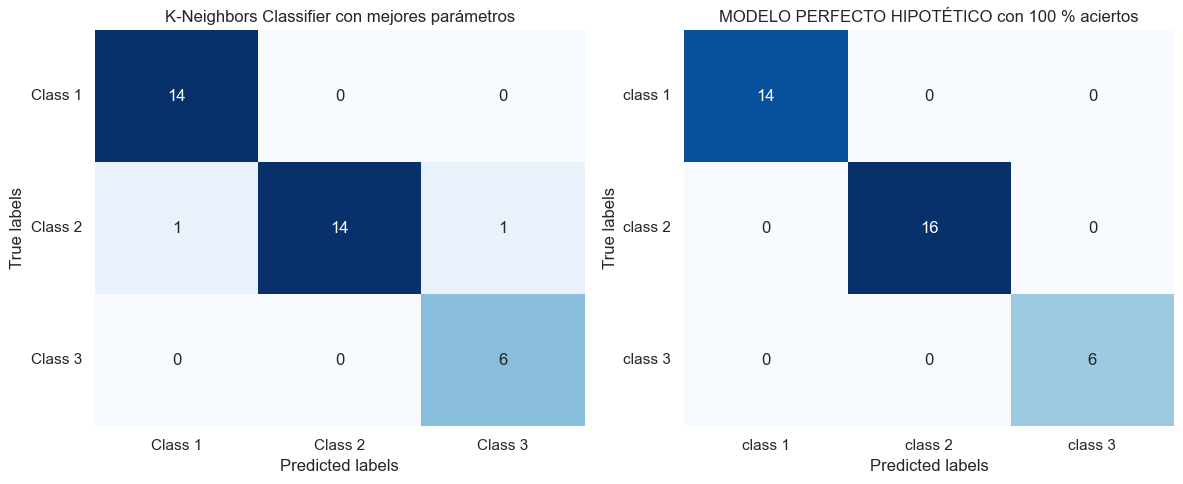

In [321]:
# Creamos una figura para mostrar las 2 matrices de confusión:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Instanciamos una matriz para cada modelo:
matrix_kn_best = metrics.confusion_matrix(Y_test, y_pred_best_param)
other_model = metrics.confusion_matrix(Y_test, y_pred)

# Configuramos las clases
Class = ['Class 1','Class 2','Class 3']
                  
# Heatmap 1
sns.heatmap(matrix_kn_best, annot=True, fmt='d', ax=axs[0], cmap='Blues', cbar=False)
axs[0].set_xlabel('Predicted labels')
axs[0].set_ylabel('True labels')
axs[0].set_title('K-Neighbors Classifier con mejores parámetros')
axs[0].xaxis.set_ticklabels(Class)
axs[0].yaxis.set_ticklabels(Class, rotation=0)

# Heatmap 2
sns.heatmap(other_model, annot=True, fmt='d', ax=axs[1], cmap='Blues', cbar=False)
axs[1].set_xlabel('Predicted labels')
axs[1].set_ylabel('True labels')
axs[1].set_title('MODELO PERFECTO HIPOTÉTICO con 100 % aciertos')
axs[1].xaxis.set_ticklabels(Nro_Class)
axs[1].yaxis.set_ticklabels(Nro_Class, rotation=0)


# Mostra la figura
plt.tight_layout()
plt.show()

**CONCLUSIÓN DEL TRABAJO** :

---> Con los datos del dataset original, aunque con los mejores parámetros, el modelo **K-Neighbors Classifier** daba muchos errores, mientras que con **Random Forest Classifier**, sólo generaba uno.

---> Con el dataset escalado, ambos ofrecen muy buenos resultados, aunque **Random Forest Classifier** llegó a acertar el 100 % de los casos y **K-Neighbors Classifier** siguió generando errores (5/178 para "X" y 2/36 para "y_pred"), puede ser que donde los datos eran más ambivalentes, o por la peculiar manera que tiene este algorítmo de calcular las probabilidades, que lo hace sensible. 

---> Para ser fiable, **K-Neighbors Classifier** necesita sí o sí, de un buen pre-procesado.